In [5]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src')
import cb_utils

sns.set(style="darkgrid")
pd.options.display.max_columns = 500

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def limit_df_to_12m_members(d):
    return d.groupby('member_id', as_index=False).filter(lambda x: x.shape[0] == 12)

In [7]:
cache = False
auths = cb_utils.get_table('vw_ds_auth_mm', use_cache=cache)
claims = cb_utils.get_table('vw_ds_claims_mm', use_cache=cache)
visits = cb_utils.get_table('vw_ds_visit_features_mm', use_cache=cache)

Pulling vw_ds_auth_mm from db
Pulling vw_ds_claims_mm from db
Pulling vw_ds_visit_features_mm from db


In [8]:
members_w_12_months = limit_df_to_12m_members(auths)

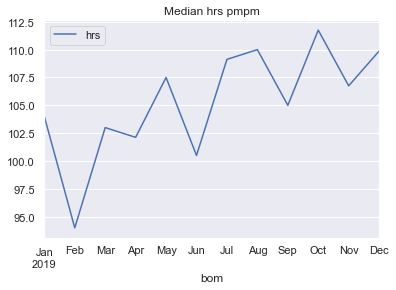

In [9]:
members_w_12_months.groupby('bom').agg({'hrs': 'median'}).plot(title="Median hrs pmpm");

In [10]:
# look at one members 12 months
members_w_12_months.groupby('bom').first()

,mco_id,eom,payer_member_id,evv_member_id,member_id,auths_n,attd_auths_n,meal_auths_n,pcs_auths_n,resp_auths_n,units,hrs,attd_pcs_units,attd_pcs_hrs,attd_units,attd_hrs,meal_units,meal_hrs,pcs_units,pcs_hrs,resp_units,resp_hrs
bom,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,2019-01-31,712182958,7303,23822.0,2,0,1,1,0,235,58.75,204,51.0,0,0.0,31,7.75,204,51.0,0,0.0
2019-02-01,1,2019-02-28,712182958,7303,23822.0,2,0,1,1,0,220,55.00,192,48.0,0,0.0,28,7.00,192,48.0,0,0.0
2019-03-01,1,2019-03-31,712182958,7303,23822.0,2,0,1,1,0,247,61.75,216,54.0,0,0.0,31,7.75,216,54.0,0,0.0
2019-04-01,1,2019-04-30,712182958,7303,23822.0,4,0,2,2,0,234,58.50,204,51.0,0,0.0,30,7.50,204,51.0,0,0.0
2019-05-01,1,2019-05-31,712182958,7303,23822.0,2,0,1,1,0,247,61.75,216,54.0,0,0.0,31,7.75,216,54.0,0,0.0
2019-06-01,1,2019-06-30,712182958,7303,23822.0,2,0,1,1,0,234,58.50,204,51.0,0,0.0,30,7.50,204,51.0,0,0.0
2019-07-01,1,2019-07-31,712182958,7303,23822.0,2,0,1,1,0,247,61.75,216,54.0,0,0.0,31,7.75,216,54.0,0,0.0
2019-08-01,1,2019-08-31,712182958,7303,23822.0,2,0,1,1,0,247,61.75,216,54.0,0,0.0,31,7.75,216,54.0,0,0.0
2019-09-01,1,2019-09-30,712182958,7303,23822.0,2,0,1,1,0,234,58.50,204,51.0,0,0.0,30,7.50,204,51.0,0,0.0


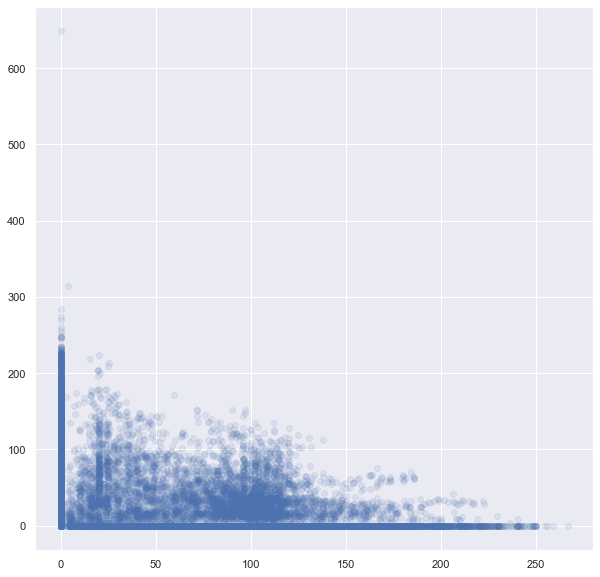

In [14]:
visits.head()

In [ ]:
# are pcs and atd hrs related?
plt.figure(figsize=(10, 10))
plt.scatter(visits.attd_visit_hrs, visits.pcs_visit_hrs, alpha=.1)

,mco_id,bom,eom,payer_member_id,evv_member_id,member_id,visit_hrs,attd_pcs_visit_hrs,attd_visit_hrs,pcs_visit_hrs,resp_visit_hrs,meal_visit_hrs,night_visit_hrs,attd_pcs_night_visit_hrs,attd_night_visit_hrs,pcs_night_visit_hrs,meal_night_visit_hrs,resp_night_visit_hrs,visit_n,attd_pcs_visit_n,attd_visit_n,pcs_visit_n,resp_visit_n,meal_visit_n,night_visit_n,attd_pcs_night_visit_n,attd_night_visit_n,pcs_night_visit_n,resp_night_visit_n,meal_night_visit_n,avg_visit_hrs,avg_night_visit_hrs,attd_avg_night_visit_hrs,pcs_avg_night_visit_hrs,resp_avg_night_visit_hrs,meal_avg_night_visit_hrs,cg_visit_nd,attd_pcs_cg_visit_nd,attd_cg_visit_nd,pcs_cg_visit_nd,meal_cg_visit_nd,resp_cg_visit_nd,missed_n,attd_pcs_missed_n,attd_missed_n,pcs_missed_n,meal_missed_n,missed_hrs,attd_pcs_missed_hrs,attd_missed_hrs,pcs_missed_hrs,meal_missed_hrs,memb_init_missed_n,attd_pcs_memb_init_missed_n,attd_memb_init_missed_n,pcs_memb_init_missed_n,meal_memb_init_missed_n,memb_init_missed_hrs,attd_pcs_memb_init_missed_hrs,attd_memb_init_missed_hrs,pcs_memb_init_missed_hrs,meal_memb_init_missed_hrs,prov_init_missed_n,attd_pcs_prov_init_missed_n,attd_prov_init_missed_n,pcs_prov_init_missed_n,meal_prov_init_missed_n,prov_init_missed_hrs,attd_pcs_prov_init_missed_hrs,attd_prov_init_missed_hrs,pcs_prov_init_missed_hrs,meal_prov_init_missed_hrs,night_missed_hrs,attd_pcs_night_missed_hrs,attd_night_missed_hrs,pcs_night_missed_hrs,meal_night_missed_hrs,night_missed_n,attd_pcs_night_missed_n,attd_night_missed_n,pcs_night_missed_n,meal_night_missed_n
0,1,2019-01-01,2019-01-31,712191346,23,26904.0,200.00,140.25,42.50,97.75,55.5,4.25,0.0,0.0,0.0,0.0,0.0,0.0,71,31,8,23,23,17,0,0,0,0,0,0,2.816901,0.00,0.0,0.0,0.0,0.00,3,2,1,1,2,1,22,0,0,0,14,528.0,0.0,0.0,0.0,336.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,22,0,0,0,14,528.0,0.0,0.0,0.0,336.0,528.0,0.0,0.0,0.0,336.0,22,0,0,0,14
1,1,2019-01-01,2019-01-31,712204061,61,27053.0,80.00,72.25,0.00,72.25,0.0,7.75,0.0,0.0,0.0,0.0,0.0,0.0,49,18,0,18,0,31,0,0,0,0,0,0,1.632653,0.00,0.0,0.0,0.0,0.00,4,3,0,3,1,0,5,5,0,5,0,10.0,10.0,0.0,10.0,0.0,5,5,0,5,0,10.0,10.0,0.0,10.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,1,2019-01-01,2019-01-31,712208195,79,23189.0,213.75,206.00,0.00,206.00,2.0,5.75,0.0,0.0,0.0,0.0,0.0,0.0,83,59,0,59,1,23,0,0,0,0,0,0,2.575301,0.00,0.0,0.0,0.0,0.00,5,4,0,4,1,1,33,3,0,3,0,721.5,1.5,0.0,1.5,0.0,1,1,0,1,0,0.5,0.5,0.0,0.5,0.0,32,2,0,2,0,721.0,1.0,0.0,1.0,0.0,720.0,0.0,0.0,0.0,0.0,30,0,0,0,0
3,1,2019-01-01,2019-01-31,712209293,6372,22409.0,115.25,109.75,109.75,0.00,0.0,5.50,0.0,0.0,0.0,0.0,0.0,0.0,44,22,22,0,0,22,0,0,0,0,0,0,2.619318,0.00,0.0,0.0,0.0,0.00,2,1,1,0,1,0,35,1,1,0,3,763.0,1.0,1.0,0.0,18.0,3,0,0,0,3,18.0,0.0,0.0,0.0,18.0,32,1,1,0,0,745.0,1.0,1.0,0.0,0.0,744.0,0.0,0.0,0.0,0.0,31,0,0,0,0
4,1,2019-01-01,2019-01-31,712211225,6605,22569.0,60.75,53.00,0.00,53.00,0.0,7.75,0.5,0.0,0.0,0.0,0.5,0.0,44,13,0,13,0,31,2,0,0,0,0,2,1.380682,0.25,0.0,0.0,0.0,0.25,2,1,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28207,1,2019-10-01,2019-10-31,712218521,9006,24064.0,49.00,49.00,0.00,49.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0,20,0,0,0,0,0,0,0,0,2.450000,0.00,0.0,0.0,0.0,0.00,1,1,0,1,0,0,2,2,0,2,0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2,2,0,2,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
28208,1,2019-03-01,2019-03-31,724944659,7323,23327.0,74.25,65.25,0.00,65.25,9.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28,21,0,21,7,0,0,0,0,0,0,0,2.651786,0.00,0.0,0.0,0.0,0.00,8,8,0,8,0,2,25,0,0,0,0,577.0,0.0,0.0,0.0,0.0,1,0,0,0,0,24.0,0.0,0.0,0.0,0.0,24,0,0,0,0,553.0,0.0,0.0,0.0,0.0,576.0,0.0,0.0,0.0,0.0,24,0,0,0

In [ ]:
g = sns.lmplot(x="attd_visit_hrs", y="pcs_visit_hrs", data=visits, scatter_kws={'alpha': .1})

# Pull together all the tables

In [ ]:
df = claims.merge(auths, how='left', on=['member_id', 'bom'], suffixes=('_claims', '_auths')).merge(visits, how='left', on=['member_id', 'bom'], suffixes=('_claims', '_visits'))
assert claims.shape[0] == df.shape[0]

In [ ]:
display(claims.shape)
display(auths.shape)
display(visits.shape)
display(df.shape)

In [ ]:
list(df.columns)

In [ ]:
pm = df.assign(pct_missed=df.missed_hrs / df.hrs)
pm.pct_missed = pm.pct_missed.fillna(0)
pm.loc[pm.lob == 1, ['lob']] = 'Medicaid'
pm.loc[pm.lob == 3, ['lob']] = 'DUAL'

# pm[['hrs', 'total_hrs_missed', 'pct_missed']]
sns.relplot(x="hrs", y="pct_missed", hue="grp", style="lob", data=pm, height=10, s=90);

In [ ]:
sns.relplot(x="hrs", y="pct_missed", size="grp", hue="lob", sizes=(15, 200), data=pm, height=10, alpha=0.3);

In [ ]:
g = sns.FacetGrid(pm, col="lob", row="grp", height=7)
g.map(plt.scatter, "hrs", "pct_missed", alpha=.3)
g.add_legend();

In [ ]:
# 90% of hrs are coming from 2
two, three = df.groupby('grp').visit_hrs.sum().values
two / (two + three)

In [ ]:
cols = [
    'member_id',
    'bom',
    'missed_hrs',
    'attd_missed_hrs',
    'pcs_missed_hrs',
    'attd_pcs_missed_hrs',
    'meal_missed_hrs',
    'pct_missed',
]
pm.loc[pm.pct_missed > 0, cols].sort_values('pct_missed', ascending=False)

# Are members consistently missing hrs, or is it random events

In [ ]:
# are the same members consistently missing hrs
threshold = 0.05
members_w_missing_hrs = pm.loc[pm.pct_missed > 0, ['member_id']].member_id.unique()
members_w_more_missing_hrs = pm.loc[pm.pct_missed > threshold, ['member_id']].member_id.unique()

pct_mem_missing_hrs = members_w_missing_hrs.shape[0] / df.member_id.unique().shape[0]
pct_mem_missing_more_hrs = members_w_more_missing_hrs.shape[0] / df.member_id.unique().shape[0]

print(f'{int(pct_mem_missing_hrs*100)}% Members have some missed hrs, {int(pct_mem_missing_more_hrs*100)}% are missing {threshold * 100}% or more hrs')

In [ ]:
pm_w_12_mo = pm.groupby('member_id', as_index=False).filter(lambda x: len(x) == 12)
pm_w_12_mo = pm_w_12_mo.query('member_id in @members_w_more_missing_hrs')[cols]
pm_w_12_mo 

In [ ]:
pm_w_12_mo_grp = pm_w_12_mo.groupby('member_id')  

In [ ]:
ax = pm_w_12_mo_grp.apply(lambda x: x.query('pct_missed > 0').shape[0]).hist()
ax.set_xlabel("# of months with hrs left unutilized")
ax.set_ylabel("# members")
ax.set_title("Number of months members under utilize for members with one month missing > 5% of visits")

# Who spends the most on hcbs disease burden wise

In [ ]:
dxes = [c for c in claims.columns if '_dx' in c]
claims[dxes]
claims.hcbs_tc.shape

In [ ]:
mem_avg = claims[dxes + ['member_id', 'hcbs_tc']].fillna(0).groupby('member_id', as_index=False).mean() # .pivot(index=member) 
mem_avg

In [ ]:
melted = mem_avg.melt(id_vars=['member_id', 'hcbs_tc'], var_name='dx', value_name='dx_val')
melted

In [ ]:
g = sns.relplot(x='dx_val', y='hcbs_tc', col='dx', col_wrap=4, hue='dx', data=melted)

# What about total cost

In [ ]:
mem_avg = claims[dxes + ['member_id', 'totl_tc']].fillna(0).groupby('member_id', as_index=False).mean()
melted = mem_avg.melt(id_vars=['member_id', 'totl_tc'], var_name='dx', value_name='dx_val')
g = sns.relplot(x='dx_val', y='totl_tc', col='dx', col_wrap=4, hue='dx', data=melted)

# What about hrs missed

In [ ]:
mem_avg = df[dxes + ['member_id', 'hrs', 'missed_hrs']].fillna(0).groupby('member_id', as_index=False).mean()
melted = mem_avg.melt(id_vars=['member_id', 'hrs', 'missed_hrs'], var_name='dx', value_name='dx_val')
g = sns.relplot(x='dx_val', y='missed_hrs', size='hrs', col='dx', col_wrap=4, hue='dx', data=melted)

# Looking at Trends

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))

for g, gdf in pm.query('member_id in @members_w_more_missing_hrs').groupby('member_id'):
    ax.plot(gdf.bom, gdf.pct_missed, alpha= .2)
    ax.set_title("Members > 5% missed in one month")
    ax.set_xlabel("Pct missed hrs")
    ax.set_ylabel("Month")

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))

for g, gdf in pm.query('member_id in @members_w_missing_hrs').groupby('member_id'):
    ax.plot(gdf.bom, gdf.pct_missed, alpha= .2)
    ax.set_title("Members with any missed hrs in one month")
    ax.set_xlabel("Pct missed hrs")
    ax.set_ylabel("Month")


In [ ]:
df_12m_w_any_missed = limit_df_to_12m_members(pm).query('member_id in @members_w_missing_hrs').assign(mpm=0)

def add_mpm(x):
    x["mpm"] = np.argmax(x.pct_missed)
    return x

df_12m_w_any_missed = df_12m_w_any_missed.groupby('member_id', as_index=False).apply(add_mpm).sort_values(['member_id', 'bom'])

df_12m_w_any_missed[['member_id', 'bom', 'pct_missed', 'mpm']].head(12) 
g = sns.relplot(x='bom', y='pct_missed', col='mpm', col_wrap=4, hue='mpm', kind='line', data=df_12m_w_any_missed)
g.set(xlim=(df_12m_w_any_missed.bom.min(), df_12m_w_any_missed.bom.max()))

In [ ]:
df_12m_w_any_missed = limit_df_to_12m_members(pm).query('member_id in @members_w_more_missing_hrs').assign(mpm=0)

def add_mpm(x):
    x["mpm"] = np.argmax(x.pct_missed)
    return x

df_12m_w_any_missed = df_12m_w_any_missed.groupby('member_id', as_index=False).apply(add_mpm).sort_values(['member_id', 'bom'])

df_12m_w_any_missed[['member_id', 'bom', 'pct_missed', 'mpm']].head(12) 
g = sns.relplot(x='bom', y='pct_missed', col='mpm', col_wrap=4, hue='mpm', kind='line', data=df_12m_w_any_missed)
g.set(xlim=(df_12m_w_any_missed.bom.min(), df_12m_w_any_missed.bom.max()))